In [ ]:
!pip install wget
!pip install plotly==5.3.1

     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import wget
from zipfile import ZipFile
import matplotlib.pyplot as plt
import plotly.express as px

#LEITURA E TRATAMENTO DOS DADOS

In [ ]:
path = "http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/"

In [ ]:
#automatiza a criação da lista de arquivos
arquivos_zip = []
anos = range(2011,2021)
for ano in anos:
  arquivos_zip.append("itr_cia_aberta_{ano}.zip".format(ano=ano))

In [ ]:
arquivos_zip

['itr_cia_aberta_2011.zip',
 'itr_cia_aberta_2012.zip',
 'itr_cia_aberta_2013.zip',
 'itr_cia_aberta_2014.zip',
 'itr_cia_aberta_2015.zip',
 'itr_cia_aberta_2016.zip',
 'itr_cia_aberta_2017.zip',
 'itr_cia_aberta_2018.zip',
 'itr_cia_aberta_2019.zip',
 'itr_cia_aberta_2020.zip']

In [ ]:
# Faz download dos arquivos
for arq in arquivos_zip:
  wget.download(path+arq)

In [ ]:
#cria a pasta all
!mkdir all

In [ ]:
#Extrai somente os arquivos selecionados
year = 2010
for arq in arquivos_zip:
  year += 1
  ZipFile(arq, 'r').extract('itr_cia_aberta_DRE_con_{ano}.csv'.format(ano = year), path='/content/all')

In [ ]:
# Automatiza a criação de uma lista de arquivos
arquivos_dre = []
for ano in anos:
   arquivos_dre.append('itr_cia_aberta_DRE_con_{ano}.csv'.format(ano = ano))
arquivos_dre

['itr_cia_aberta_DRE_con_2011.csv',
 'itr_cia_aberta_DRE_con_2012.csv',
 'itr_cia_aberta_DRE_con_2013.csv',
 'itr_cia_aberta_DRE_con_2014.csv',
 'itr_cia_aberta_DRE_con_2015.csv',
 'itr_cia_aberta_DRE_con_2016.csv',
 'itr_cia_aberta_DRE_con_2017.csv',
 'itr_cia_aberta_DRE_con_2018.csv',
 'itr_cia_aberta_DRE_con_2019.csv',
 'itr_cia_aberta_DRE_con_2020.csv']

In [ ]:
pd.read_csv('all/itr_cia_aberta_DRE_con_2011.csv', sep = ';', decimal=',', encoding='ISO-8859-1')

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.01,Receita de Venda de Bens e/ou Serviços,6159172.0000000000,S
1,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.01,Receita de Venda de Bens e/ou Serviços,8551982.0000000000,S
2,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-960060.0000000000,S
3,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-1127021.0000000000,S
4,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.02.01,Encargos Setoriais,-340660.0000000000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123571,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-07-01,2011-09-30,3.99.02,Lucro Diluído por Ação,0.0000000000,N
123572,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-09-30,3.99.02.01,ON,0.6943000000,N
123573,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-07-01,2010-09-30,3.99.02.01,ON,0.3263000000,N
123574,97.837.181/0001-47,2011-09-30,1,DURATEX S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-09-30,3.99.02.01,ON,0.5288000000,N


In [ ]:
#Junta os arquivos de 2011 até 2020 em somente um
dre_2011_2020 = pd.DataFrame()
year = 2010
for arq in arquivos_dre:
  year += 1
  dre_2011_2020 = pd.concat([dre_2011_2020, pd.read_csv(f'all/itr_cia_aberta_DRE_con_{year}.csv', sep = ';', decimal=',', encoding='ISO-8859-1')])

In [ ]:
dre_2011_2020

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.01,Receita de Venda de Bens e/ou Serviços,6159172.0000000000,S
1,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.01,Receita de Venda de Bens e/ou Serviços,8551982.0000000000,S
2,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-960060.0000000000,S
3,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-1127021.0000000000,S
4,00.001.180/0001-26,2011-03-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2010-01-01,2010-03-31,3.02.01,Encargos Setoriais,-340660.0000000000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137851,97.837.181/0001-47,2020-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-07-01,2020-09-30,3.99.02,Lucro Diluído por Ação,0.0000000000,N
137852,97.837.181/0001-47,2020-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2019-01-01,2019-09-30,3.99.02.01,ON,0.1734000000,N
137853,97.837.181/0001-47,2020-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2019-07-01,2019-09-30,3.99.02.01,ON,0.0398000000,N
137854,97.837.181/0001-47,2020-09-30,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-01-01,2020-09-30,3.99.02.01,ON,0.2187000000,N


In [ ]:
#filtra o último
dre_2011_2020 = dre_2011_2020[dre_2011_2020['ORDEM_EXERC'] == 'ÚLTIMO'] 
#Filtrar a empresa
dre_2011_2020 = dre_2011_2020[dre_2011_2020['DENOM_CIA'] == 'PETROLEO BRASILEIRO S.A. PETROBRAS'] 

dre_2011_2020

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
72425,33.000.167/0001-01,2011-03-31,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.01,Receita de Venda de Bens e/ou Serviços,54800499.0000000000,S
72427,33.000.167/0001-01,2011-03-31,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-34596085.0000000000,S
72429,33.000.167/0001-01,2011-03-31,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.03,Resultado Bruto,20204414.0000000000,S
72431,33.000.167/0001-01,2011-03-31,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.04,Despesas/Receitas Operacionais,-7391736.0000000000,S
72433,33.000.167/0001-01,2011-03-31,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-03-31,3.04.01,Despesas com Vendas,-2116097.0000000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84701,33.000.167/0001-01,2020-09-30,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-07-01,2020-09-30,3.99.02,Lucro Diluído por Ação,0.0000000000,N
84704,33.000.167/0001-01,2020-09-30,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-01-01,2020-09-30,3.99.02.01,ON,-4.0500000000,N
84705,33.000.167/0001-01,2020-09-30,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-07-01,2020-09-30,3.99.02.01,ON,-0.1200000000,N
84708,33.000.167/0001-01,2020-09-30,1,PETROLEO BRASILEIRO S.A. PETROBRAS,9512,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-01-01,2020-09-30,3.99.02.02,PN,-4.0500000000,N


In [ ]:
# Cria um vetor com valor de cada conta e o transforma em string
digitos = dre_2011_2020['VL_CONTA'].astype('string')
digitos

72425     54800499.0000000000
72427    -34596085.0000000000
72429     20204414.0000000000
72431     -7391736.0000000000
72433     -2116097.0000000000
                 ...         
84701            0.0000000000
84704           -4.0500000000
84705           -0.1200000000
84708           -4.0500000000
84709           -0.1200000000
Name: VL_CONTA, Length: 2112, dtype: string

In [ ]:
#retira o "-" 
digitos = digitos.replace('-', '')
#retira o "."
digitos = digitos.replace('.', '')
#Transforma os dados em inteiro e, em seguida, retira todos os 0
digitos = digitos.astype(int)
digitos = digitos[digitos.loc[:]!= 0]

In [ ]:
digitos

72425    548004990000000000
72427    345960850000000000
72429    202044140000000000
72431     73917360000000000
72433     21160970000000000
                ...        
84697            1200000000
84704           40500000000
84705            1200000000
84708           40500000000
84709            1200000000
Name: VL_CONTA, Length: 1572, dtype: int64

In [ ]:
# Conta o primeiro dígito e transforma em %
digitos = digitos.astype(str).str[0].value_counts(normalize=True)

#cria um dataframe com os valores acima
digitos_df = pd.DataFrame({"Primeiro Dígito": digitos.index, "Proporção": digitos.values, "Distribuição": 'DRE'})

TypeError: ignored

#BENFORD' LAW

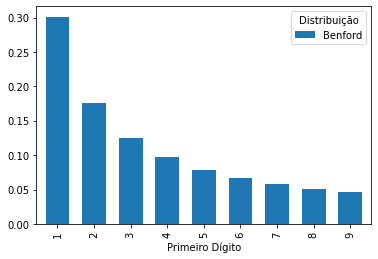

In [ ]:
benford_df = pd.DataFrame({'Primeiro Dígito': ['1', '2', '3', '4','5', '6', '7', '8', '9'], 'Proporção': [.301, .176, .125, .097, .079, .067, .058, .051, .046], 'Distribuição': 'Benford'})
benford_df.pivot('Primeiro Dígito', 'Distribuição', 'Proporção').plot(kind='bar', width=.65)

In [ ]:
#junta os dois dataframes
merge = pd.concat([benford_df, digitos_df]).pivot('Primeiro Dígito', 'Distribuição', 'Proporção')

In [ ]:
# Arredonda para 3 casas decimais a coluna DRE
merge['DRE'] = merge['DRE'].astype(float).round(3)

In [ ]:
fig = px.bar(
    merge,
    title="Benford's Law x DRE: Petrobras",
    barmode="group",
    text="value",
    width = 700,
    height = 500,
    color_discrete_sequence = ['#192130','#cb9691' ],
)
fig

#Análise Estatística com R

In [ ]:
%load_ext rpy2.ipython

In [ ]:
#https://github.com/cran/benford.analysis
%%R
devtools::install_github("carloscinelli/benford.analysis")

R[write to console]: Downloading GitHub repo carloscinelli/benford.analysis@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                                 
2: CRAN packages only                  
3: None                                
4: data.table (1.14.0 -> 1.14.2) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 2
data.table (1.14.0 -> 1.14.2) [CRAN]


R[write to console]: Installing 1 packages: data.table

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5301817 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

✔  checking for file ‘/tmp/RtmpWsGH3T/remotes404f8e2a06/carloscinelli-benford.analysis-31a98c4/DESCRIPTION’ (346ms)
─  preparing ‘benford.analysis’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘benford.analysis_0.1.5.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
%%R
library(benford.analysis)

In [ ]:
digitos2 = digitos.astype(float)
digitos_df2 = pd.DataFrame({"Números": digitos2.values})
digitos_df2

,Números
0,5.480050e+17
1,3.459608e+17
2,2.020441e+17
3,7.391736e+16
4,2.116097e+16
...,...
1567,1.200000e+09
1568,4.050000e+10
1569,1.200000e+09
1570,4.050000e+10


In [ ]:
get_ipython().run_line_magic(
"R",
"-i digitos_df2"
)

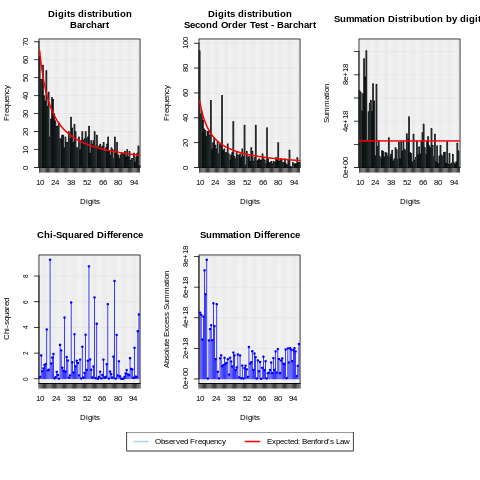

In [ ]:
%%R
bfd = benford(digitos_df2$Números)
plot(bfd)

In [ ]:
%%R
bfd


Benford object:
 
Data: digitos_df2$Números 
Number of observations used = 1572 
Number of obs. for second order = 1293 
First digits analysed = 2

Mantissa: 

   Statistic  Value
        Mean  0.517
         Var  0.083
 Ex.Kurtosis -1.232
    Skewness -0.119


The 5 largest deviations: 

  digits absolute.diff
1     19         18.02
2     16         12.61
3     54         10.47
4     11         10.40
5     38         10.27

Stats:

	Pearson's Chi-squared test

data:  digitos_df2$Números
X-squared = 130.57, df = 89, p-value = 0.002722


	Mantissa Arc Test

data:  digitos_df2$Números
L2 = 0.0036419, df = 2, p-value = 0.003263


	Kolmogorov-Smirnov test

data:  digitos_df2$Números
D = 0.050522, critical value = 0.034301

Mean Absolute Deviation (MAD): 0.002521228
MAD Conformity - Nigrini (2012): Nonconformity
Distortion Factor: 3.213521

Remember: Real data will never conform perfectly to Benford's Law. You should not focus on p-values!

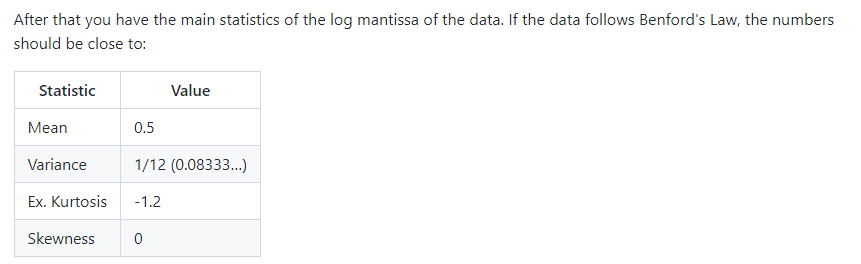

In [ ]:
%%R
suspeitos = getSuspects(bfd, digitos_df2)
suspeitos

         Números
 1: 1.657300e+15
 2: 1.947379e+16
 3: 1.681010e+10
 4: 1.681010e+10
 5: 1.681010e+10
 6: 1.681010e+10
 7: 1.699750e+15
 8: 1.689671e+16
 9: 1.612326e+16
10: 1.601522e+17
11: 1.949628e+17
12: 1.676300e+17
13: 1.638036e+16
14: 1.638036e+16
15: 1.914710e+15
16: 1.904430e+17
17: 1.616562e+16
18: 1.606131e+17
19: 1.934106e+17
20: 1.697130e+18
21: 1.658568e+17
22: 1.945360e+17
23: 1.674601e+16
24: 1.638430e+18
25: 1.901500e+17
26: 1.657000e+17
27: 1.613000e+16
28: 1.937980e+18
29: 1.604900e+17
30: 1.980000e+15
31: 1.690000e+15
32: 1.648080e+18
33: 1.691000e+16
34: 1.600000e+09
35: 1.600000e+09
36: 1.600000e+09
37: 1.600000e+09
38: 1.637000e+16
39: 1.641000e+16
40: 1.611800e+17
41: 1.650000e+16
42: 1.650000e+16
43: 1.640400e+17
44: 1.911000e+16
45: 1.600000e+16
46: 1.677000e+17
47: 1.980000e+16
48: 1.632300e+17
49: 1.632300e+17
50: 1.645800e+17
51: 1.659000e+17
52: 1.984000e+16
53: 1.984000e+16
54: 1.665000e+16
55: 1.640000e+15
56: 1.697600e+17
57: 1.681600e+17
58: 1.681600e+